# **1. Business Understanding**

- The `Hotel Bookings Dataset` contains a comprehensive collection of information pertaining to hotel bookings, cancellations, and guests' details for Resort and City Hotels. From the dataset's description, "it provides insights into various aspects such as the type of hotel, the number of adults, children, and babies per booking, the length of stay, the meal plan chosen by guests," and other features. The travel industry is booming following the COVID restrictions that were in place over the past few years. However, cancellations are inevitable and can negatively impact hotel operations. The provided data in this dataset can facilitate analysis by examining the factors that are likely to lead to a cancellation, such as long lead times, the average daily rate, or even past cancellation behaviors. This dataset aims to identify these trends to predict whether a cancellation will occur or not.

- The dataset contains 119,390 rows and 33 features. The target feature is `is_canceled`, which indicates whether a reservation was canceled or not. Although the methods for acquiring this dataset are not explicitly stated, it is reasonable to infer that it was collected by hotel management systems or third-party booking platforms. The purpose for its collection was likely to assess the factors and trends leading to cancellations in reservations. Cancellations can financially impact hotel operations, especially if they occur last minute, after hotels have already allocated their budgets.

- The prediction task for this dataset is to predict whether a cancellation will happen or not based on trends or patterns identified in the data. For example, if city hotels experience more cancellations than resort hotels, it could indicate what guests value more in their hotel experiences. Accurate predictions would be beneficial to various stakeholders:
    - **Hotel Managers**: They could use the model to minimize revenue loss and optimize operations by adjusting pricing or offering last-minute deals for canceled rooms.
    - **Marketing Teams**: Insights from cancellation trends could help marketing departments design campaigns that attract guests less likely to cancel, or improve service offerings to reduce cancellation rates.
    - **Local Businesses**: Hotels often operate near popular destinations (e.g., Disneyland or downtown areas), so reducing cancellations ensures more tourists stay, benefiting nearby businesses.

## Measure of Success

To determine whether the prediction algorithm is successful, several criteria should be considered:

- **Accuracy**: The model should perform significantly better than random chance (50%). A success rate of over 90% would indicate that the model is effective in predicting cancellations, ensuring more reliable business decisions. An accuracy of 90% or higher would help hotels confidently adjust their overbooking strategies, dynamically price rooms, and increase operational efficiency.
  
- **Precision and Recall**: 
   - **Precision**: It is crucial to avoid incorrect predictions of cancellations (false positives) as these could lead to overbooking and customer dissatisfaction. 
   - **Recall**: Ensuring that most cancellations are correctly predicted (high recall) minimizes unexpected losses due to no-shows. 
   - A **balanced F1 score** (harmonic mean of precision and recall) would indicate an optimal trade-off between avoiding false positives and false negatives, making the model more practical for real-world use.

- **Practical Impact**: The model needs to be robust and flexible to handle real-world variability. For example, it should accommodate fluctuating booking patterns during peak seasons and varying customer behavior. Additionally, a successful model should help hotels maintain occupancy rates close to industry benchmarks (typically around 70%-80%) by dynamically adjusting prices for canceled rooms or offering last-minute deals to minimize revenue loss.

## Real-World Examples and Benchmarks

- **Overbooking Strategies**: Many hotels rely on predictive models to allow for overbooking, ensuring occupancy rates near 100%. Accurately predicting cancellations enables hotels to avoid losing revenue from empty rooms while preventing too many customers from arriving with insufficient room availability.
  
- **Revenue Management**: Accurate cancellation predictions can lead to a 10-15% improvement in overall hotel revenue by optimizing pricing strategies and maximizing room availability.

- **Operational Efficiency**: By predicting cancellations and adjusting for them in advance, hotels can better allocate their resources, adjust staffing levels, and reduce operational costs. For instance, if a high probability of cancellations is predicted for a particular weekend, hotel management can optimize staff scheduling and avoid overstaffing.



Resource: https://www.kaggle.com/datasets/thedevastator/hotel-bookings-analysis/data
- https://data.world/mesum/hotel-bookings-dataset/workspace/file?filename=hotel_bookings.csv

# **2. Data Understanding**

In [114]:
# Modules & Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### **2.1 Loading the Dataset & Defining Data Types**

In [115]:
# Loading the dataset
path = '../Data/hotel_bookings.csv'

# Read in csv file
df = pd.read_csv(path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [116]:
# Note that the describe function defaults to using only some variables
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [117]:
# Returns the dimensions of the DataFrame as (number of rows, number of columns)
df.shape

(119390, 32)

In [118]:
# Returns an index object containing the column labels of the DataFrame.
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [119]:
# Provides a concise summary of the DataFrame including data types, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Attributes Kept
We narrowed down the dataset from 32 attributes to 10 key features that closely align with our objective and prediction task. 

- **Aggregated Features:**
    - `num_of_guests`: This combines `adults`, `children`, and `babies` because the total number of guests is more likely to influence cancellations than each guest type separately.
    - `length_of_stay`: This merges `stays_in_weekend_nights` and `stays_in_week_nights` to reflect the total duration of the stay, which is more significant than the specific days of the week.
  
- **Individual Attributes:**
    - `hotel`: This captures whether the booking is for a resort or city hotel, which is important for understanding cancellation trends across different types of hotels (i.e. vacations vs. business trips).
    - `is_repeated_guest`, `previous_cancellations`, `booking_changes`: These provide insights into guest behavior, including past cancellations and modifications, which could predict future cancellations.
    - `adr`: The average daily rate paid by guests, which helps reveal if cancellations are more likely at certain price points.
    - `deposit_type`: Reflects whether a deposit was made, which is important in determining the likelihood of follow-through on the reservation.
    - `lead_time`: The amount of time between booking and arrival, a key factor in understanding guest decision patterns.

These attributes were selected based on their relevance to predicting cancellations and their potential to provide meaningful insights into guest behaviors and booking patterns.

#### Attributes Collected in Data

##### Categorical:
- **`hotel`**: Indicates the type of hotel (resort or city).
    - bool
    - 0=Resort Hotel, 1=City Hotel
- **`is_canceled`**: Specifies whether the booking was canceled or not.
    - 0=not canceled, 1=canceled
    - **target**: int
- **`is_repeated_guest`**: Indicates whether a guest is a repeated visitor.
    - 0=not repeated, 1=repeated
    - bool
- **`deposit_type`**: Indicates the type of deposit made for the booking.
    - One-hot encoded
    - 3 values: 'No Deposit', 'Refundable', 'Non Refund'

##### Numerical:
- **`lead_time`**: Represents the number of days between the booking date and the arrival date.
    - int
- **`length_of_stay`**: Number of nights spent in total.
    - int
- **`num_of_guests`**: Total number of guests under reservation.
    - int
- **`previous_cancellations`**: Number of times the guest previously canceled their bookings.
    - int
- **`booking_changes`**: Number of changes made to the booking.
    - int
- **`adr`**: Represents the average daily rate (price per room) for the booking.
    - float


In [120]:
# Attributes Dropped
df.drop(['arrival_date_year', 'arrival_date_month', 
         'arrival_date_week_number', 
         'arrival_date_day_of_month', 
         'agent', 
         'company', 
         'required_car_parking_spaces', 
         'reservation_status_date',
         'meal',
         'country',
         'market_segment',
         'distribution_channel',
         'previous_bookings_not_canceled',
         'reserved_room_type',
         'assigned_room_type',
         'days_in_waiting_list',
         'customer_type',
         'required_car_parking_spaces',
         'reservation_status',
         'total_of_special_requests'
         ],
        axis=1,
        inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hotel                    119390 non-null  object 
 1   is_canceled              119390 non-null  int64  
 2   lead_time                119390 non-null  int64  
 3   stays_in_weekend_nights  119390 non-null  int64  
 4   stays_in_week_nights     119390 non-null  int64  
 5   adults                   119390 non-null  int64  
 6   children                 119386 non-null  float64
 7   babies                   119390 non-null  int64  
 8   is_repeated_guest        119390 non-null  int64  
 9   previous_cancellations   119390 non-null  int64  
 10  booking_changes          119390 non-null  int64  
 11  deposit_type             119390 non-null  object 
 12  adr                      119390 non-null  float64
dtypes: float64(2), int64(9), object(2)
memory usage: 11.8+ MB


### **2.2 Verifying Data Quality**

### Handling Missing and Duplicated Data

Before proceeding with feature aggregation, it’s crucial to ensure data quality by addressing missing and duplicated values.

#### Missing Data:
- **Identified Issue**: The `children` attribute had 4 missing values out of 119,390 entries. These missing values were likely caused by users leaving the "number of children" field blank during the booking process.
- **Analysis and Visualization**: To verify this, we visualized missing data using a bar plot, which showed that only the `children` column had missing entries, and the extent of missingness was minimal.
- **Justification for Imputation**: Given that there were only 4 missing values and that these likely represent bookings without children, we imputed the missing values with `0`. Since the impact is minor and the missing data represents less than 0.01% of the total entries, this method prevents skewing the dataset without requiring more advanced imputation techniques like KNN, which would be unnecessary for such a small fraction.

#### Duplicated Data:
- **Identified Issue**: We detected 41,787 duplicate entries out of 119,390 total entries (about 35% of the data). 
- **Potential Causes**: Duplicates may have resulted from merging different systems or accidental/intentional multiple bookings by the same guests.
- **Visualization**: We confirmed the presence of duplicates by simply looking at the first 6 entries in the dataset and spotting a duplicate in the 5th and 6th entries.
- **Justification for Elimination**: After examining the dataset, we decided to drop all duplicates. The reason for this is to prevent over-representation of certain guests or bookings, which could introduce bias in our model. By removing these 41,787 duplicate entries, we ensure that each entry represents a unique booking instance. After cleaning, we have over 70,000 unique entries, which remains a robust dataset for analysis.

In [122]:
# check for missing values
df.isnull().sum()

hotel                      0
is_canceled                0
lead_time                  0
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
children                   4
babies                     0
is_repeated_guest          0
previous_cancellations     0
booking_changes            0
deposit_type               0
adr                        0
dtype: int64

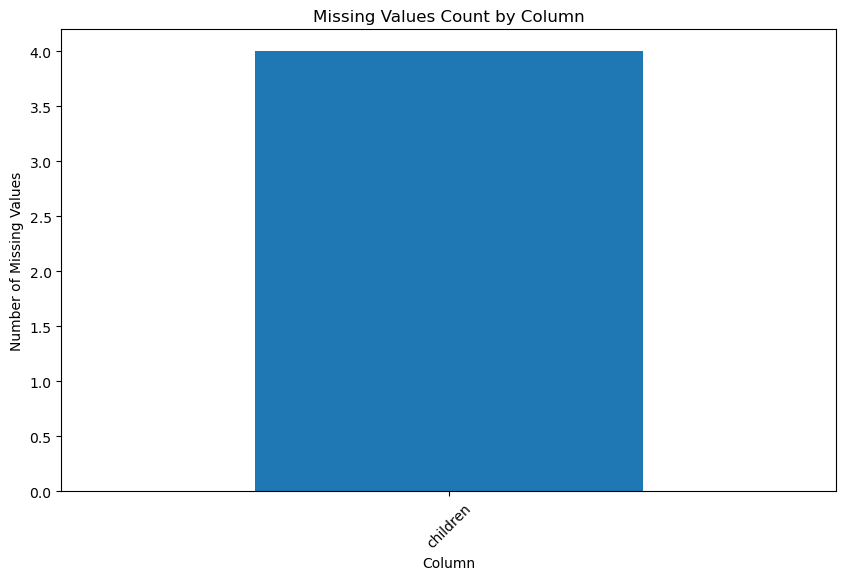

In [123]:
#Counting the missing values per col/attribute
missing_counts = df.isnull().sum()

# plot missing values
plt.figure(figsize=(10, 6))
missing_counts[missing_counts > 0].plot(kind='bar')
plt.title('Missing Values Count by Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

In [124]:
# Checking for Duplicates
df.duplicated().sum()

41787

In [125]:
# Example: Last two entries here are duplicates!
df.head(6)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,deposit_type,adr
0,Resort Hotel,0,342,0,0,2,0.0,0,0,0,3,No Deposit,0.0
1,Resort Hotel,0,737,0,0,2,0.0,0,0,0,4,No Deposit,0.0
2,Resort Hotel,0,7,0,1,1,0.0,0,0,0,0,No Deposit,75.0
3,Resort Hotel,0,13,0,1,1,0.0,0,0,0,0,No Deposit,75.0
4,Resort Hotel,0,14,0,2,2,0.0,0,0,0,0,No Deposit,98.0
5,Resort Hotel,0,14,0,2,2,0.0,0,0,0,0,No Deposit,98.0


### Converting to Appropriate Data Types
- Now that we've discovered missing and duplicated data, we can proceed to impute and eliminate, respectively.
- But first, we'll make sure to convert to appropriate data types if needed!
    - We also need to aggregate a few attributes

In [126]:
# Convert hotel to boolean
df['hotel'] = df['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1}).astype('bool')

# Convert is_repeated_guest to boolean
df['is_repeated_guest'] = df['is_repeated_guest'].astype('bool')

# One hot encoding deposit_type, indicating presence (1) or absence (0).
if 'deposit_type' in df.columns:
    df = pd.get_dummies(df, columns=['deposit_type'], prefix=['deposit_type'])

# Imputing misisng values, children attribute with 0
df['children'] = df['children'].fillna(0).astype('int') 

In [127]:
# Aggregation of 'adults', 'children', and 'babies' into 'num_of_guests'
df['num_of_guests'] = df['adults'] + df['children'] + df['babies']

# Aggregation of 'stays_in_weekend_nights' and 'stays_in_week_nights' into 'length_of_stay'
df['length_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Dropping the attributes we aggregated
df = df.drop(columns=['adults', 'children', 'babies', 'stays_in_weekend_nights', 'stays_in_week_nights'])

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hotel                    119390 non-null  bool   
 1   is_canceled              119390 non-null  int64  
 2   lead_time                119390 non-null  int64  
 3   is_repeated_guest        119390 non-null  bool   
 4   previous_cancellations   119390 non-null  int64  
 5   booking_changes          119390 non-null  int64  
 6   adr                      119390 non-null  float64
 7   deposit_type_No Deposit  119390 non-null  bool   
 8   deposit_type_Non Refund  119390 non-null  bool   
 9   deposit_type_Refundable  119390 non-null  bool   
 10  num_of_guests            119390 non-null  int64  
 11  length_of_stay           119390 non-null  int64  
dtypes: bool(5), float64(1), int64(6)
memory usage: 6.9 MB


In [129]:
# No more null values!
df.isnull().sum()

hotel                      0
is_canceled                0
lead_time                  0
is_repeated_guest          0
previous_cancellations     0
booking_changes            0
adr                        0
deposit_type_No Deposit    0
deposit_type_Non Refund    0
deposit_type_Refundable    0
num_of_guests              0
length_of_stay             0
dtype: int64

In [130]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)

In [131]:
# No more duplicates!
df.duplicated().sum()

0

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75409 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    75409 non-null  bool   
 1   is_canceled              75409 non-null  int64  
 2   lead_time                75409 non-null  int64  
 3   is_repeated_guest        75409 non-null  bool   
 4   previous_cancellations   75409 non-null  int64  
 5   booking_changes          75409 non-null  int64  
 6   adr                      75409 non-null  float64
 7   deposit_type_No Deposit  75409 non-null  bool   
 8   deposit_type_Non Refund  75409 non-null  bool   
 9   deposit_type_Refundable  75409 non-null  bool   
 10  num_of_guests            75409 non-null  int64  
 11  length_of_stay           75409 non-null  int64  
dtypes: bool(5), float64(1), int64(6)
memory usage: 5.0 MB


In [133]:
# Reset the index just so it's easier to read the rows/entries
df = df.reset_index(drop=True)
df.tail()

,hotel,is_canceled,lead_time,is_repeated_guest,previous_cancellations,booking_changes,adr,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,num_of_guests,length_of_stay
75404,True,0,23,False,0,0,96.14,True,False,False,2,7
75405,True,0,102,False,0,0,225.43,True,False,False,3,7
75406,True,0,34,False,0,0,157.71,True,False,False,2,7
75407,True,0,109,False,0,0,104.40,True,False,False,2,7
75408,True,0,205,False,0,0,151.20,True,False,False,2,9


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75409 entries, 0 to 75408
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    75409 non-null  bool   
 1   is_canceled              75409 non-null  int64  
 2   lead_time                75409 non-null  int64  
 3   is_repeated_guest        75409 non-null  bool   
 4   previous_cancellations   75409 non-null  int64  
 5   booking_changes          75409 non-null  int64  
 6   adr                      75409 non-null  float64
 7   deposit_type_No Deposit  75409 non-null  bool   
 8   deposit_type_Non Refund  75409 non-null  bool   
 9   deposit_type_Refundable  75409 non-null  bool   
 10  num_of_guests            75409 non-null  int64  
 11  length_of_stay           75409 non-null  int64  
dtypes: bool(5), float64(1), int64(6)
memory usage: 4.4 MB


### One Last Thing: Checking For Outliers

In [135]:
df.describe()

,is_canceled,lead_time,previous_cancellations,booking_changes,adr,num_of_guests,length_of_stay
count,75409.000000,75409.000000,75409.000000,75409.000000,75409.000000,75409.000000,75409.000000
mean,0.302338,84.374557,0.032529,0.293678,110.144387,2.079128,3.865427
std,0.459274,85.314686,0.388119,0.762739,55.912369,0.813216,2.825820
min,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,0.000000,75.000000,2.000000,2.000000
50%,0.000000,56.000000,0.000000,0.000000,101.400000,2.000000,3.000000
75%,1.000000,131.000000,0.000000,0.000000,138.000000,2.000000,5.000000
max,1.000000,737.000000,26.000000,21.000000,5400.000000,55.000000,69.000000


- There seems to be extreme values found in the following attributes: `lead_time` with a max of 737 and mean of 84.37, and `adr` with a max of 5400 and mean of 110.14.
    - These two can have the most significant negative impact on the analysis of predicting cancellations as it may bias towards these values. 
    - In addition, `adr` has a min value of -6.38 which seems like a data entry error unless the hotel paid someone $6.38 to reserve a room (highly unlikely)
        - In this case, we'll ensure `adr` values are greater than 0 and remove any entries that are not.
- We decided to apply `IQR` as `lead_time` and `adr` are skewed and using this method would be more robust.
    - `lead_time` (most people book within a short time, but a few might book very far in advanced)
    - `adr` (high-end bookings or promotions that could cause large deviations)

In [136]:
# Resolving the negative value in adr
df = df[df['adr'] >= 0]

In [137]:
# IQR Function
def remove_outliers_iqr(df, column):
    # Calculate the first and third quartile
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    ## Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    df= df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [138]:
# Define columns for which outlier to remove
columns_to_filter = ['lead_time', 'adr']

# Iterate and apply function
for col in columns_to_filter:
    df = remove_outliers_iqr(df, col)

In [139]:
df = df.reset_index(drop=True)

In [140]:
# Extreme outliers from `lead_time` and `adr` have been removed! 
df.describe()

,is_canceled,lead_time,previous_cancellations,booking_changes,adr,num_of_guests,length_of_stay
count,71680.000000,71680.000000,71680.000000,71680.000000,71680.000000,71680.000000,71680.000000
mean,0.295159,77.739425,0.032631,0.285603,106.403132,2.048493,3.819127
std,0.456117,74.295277,0.396005,0.748097,46.335759,0.687073,2.796497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15.000000,0.000000,0.000000,75.000000,2.000000,2.000000
50%,0.000000,54.000000,0.000000,0.000000,100.065000,2.000000,3.000000
75%,1.000000,124.000000,0.000000,0.000000,135.000000,2.000000,5.000000
max,1.000000,303.000000,26.000000,21.000000,235.000000,12.000000,69.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71680 entries, 0 to 71679
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    71680 non-null  bool   
 1   is_canceled              71680 non-null  int64  
 2   lead_time                71680 non-null  int64  
 3   is_repeated_guest        71680 non-null  bool   
 4   previous_cancellations   71680 non-null  int64  
 5   booking_changes          71680 non-null  int64  
 6   adr                      71680 non-null  float64
 7   deposit_type_No Deposit  71680 non-null  bool   
 8   deposit_type_Non Refund  71680 non-null  bool   
 9   deposit_type_Refundable  71680 non-null  bool   
 10  num_of_guests            71680 non-null  int64  
 11  length_of_stay           71680 non-null  int64  
dtypes: bool(5), float64(1), int64(6)
memory usage: 4.2 MB


### Data Understanding Summary

- **Data Types**: All attributes are now represented in their appropriate data types.
- **Feature Aggregation**: Aggregated attributes as needed for efficiency.
- **Missing Values**: Imputed missing values to ensure completeness.
- **Duplicates**: Removed duplicate entries to avoid over-representation and bias.